In [59]:
import numpy as np
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, LassoCV

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [60]:
contra = pd.read_csv("cmc.data")

In [61]:
contra.head(5)

,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [62]:
contra.columns=['wife_age',	
                'wife_education',
                'husband_education',
                'num_child','wife_religion',
                'wife_work',
                'husband_occupation',
                'standard_living',
                'media_exposure',
                'contraceptive']

In [63]:
contra.head(5)

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [64]:
contra.shape

(1472, 10)

In [65]:
#limpeza de dados. Veja se há algum valor ausente no conjunto de dados.
contra.isnull().sum()
#Sem valores ausentes

wife_age              0
wife_education        0
husband_education     0
num_child             0
wife_religion         0
wife_work             0
husband_occupation    0
standard_living       0
media_exposure        0
contraceptive         0
dtype: int64

In [66]:
#Changing husband occupation/wife working / media exposure values to more conventional values

def replace_val(df, cols, old, new):
  #df: dataframe
  #cols: list of columns
  #old: list of old values ---- new: list of new values
  df[cols] = df[cols].replace(old, new)

#1=No-use, 2=Long-term, 3=Short-term ->>> 1=No-use, 2=Short-term, 3=Short-term
replace_val(contra, ["contraceptive"], [1, 2, 3], [1, 3, 2]) 

#0=Yes, 1=No ->>> 0=No, 1=Yes
replace_val(contra, ["wife_work", "media_exposure"], [0, 1], [1, 0])

##1=Professional, 2=Sales, 3=Manual, 4=Agriculture ->>> 4=Professional, 3=Sales, 2=Manual, 1=Agriculture
replace_val(contra, "husband_occupation", [1, 2, 3, 4], [4, 3, 2, 1])

#Created an additional copy for EDA 
contra.head(5)
contra_copy = contra.copy(deep=True)

In [67]:
#Changing nominal numerical numbers to qualitative terms for one-hot encoding.

def replace_val(df, cols, old, new):
  #df: dataframe
  #cols: list of columns
  #old: list of old values ---- new: list of new values
  df[cols] = df[cols].replace(old, new)

replace_val(contra, ["standard_living", "wife_education",	"husband_education"], [1, 2, 3, 4], ["Low", "Low-Medium", "Medium", "High"])
replace_val(contra, ["wife_work"], [0, 1], ["No", "Yes"])
replace_val(contra, ["husband_occupation"], [4, 3, 2, 1], ["Professional", "Sales", "Manual", "Agriculture"])
replace_val(contra, ["media_exposure"], [0, 1], ["Not Good", "Good"])
replace_val(contra, ['wife_religion'], [0, 1], ['Non-Islam', 'Islam'])

In [68]:
def replace_val(df, cols, old, new):
      #df: dataframe
  #cols: list of columns
  #old: list of old values ---- new: list of new values
  df[cols] = df[cols].replace(old, new)

replace_val(contra, ["standard_living", "wife_education",	"husband_education"], [1, 2, 3, 4], ["Low", "Low-Medium", "Medium", "High"])
replace_val(contra, ["wife_work"], [0, 1], ["No", "Yes"])
replace_val(contra, ["husband_occupation"], [4, 3, 2, 1], ["Professional", "Sales", "Manual", "Agriculture"])
replace_val(contra, ["media_exposure"], [0, 1], ["Not Good", "Good"])
replace_val(contra, ['wife_religion'], [0, 1], ['Non-Islam', 'Islam'])
contra.head(5)

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,45,Low,Medium,10,Islam,No,Manual,High,Good,1
1,43,Low-Medium,Medium,7,Islam,No,Manual,High,Good,1
2,42,Medium,Low-Medium,9,Islam,No,Manual,Medium,Good,1
3,36,Medium,Medium,8,Islam,No,Manual,Low-Medium,Good,1
4,19,High,High,0,Islam,No,Manual,Medium,Good,1


In [69]:
#One-hot-encoding the dataset

from sklearn.feature_extraction import DictVectorizer

cate_cols = ['wife_education', 'husband_education',	'wife_religion',	'wife_work',	'husband_occupation',	'standard_living',	'media_exposure']

def ohe_qu(data):
    vec_enc = DictVectorizer()
    vec_enc.fit(data[cate_cols].to_dict(orient='records'))
    qu_data = vec_enc.transform(data[cate_cols].to_dict(orient='records')).toarray()
    qu_cats = vec_enc.get_feature_names()
    all_qu = pd.DataFrame(qu_data, columns=qu_cats)
    data = pd.concat([data.drop(columns = cate_cols), all_qu], axis=1)
    return data

contra = ohe_qu(contra)
contra.head(5)

c:\Users\tassi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,wife_age,num_child,contraceptive,husband_education=High,husband_education=Low,husband_education=Low-Medium,husband_education=Medium,husband_occupation=Agriculture,husband_occupation=Manual,husband_occupation=Professional,...,standard_living=Low-Medium,standard_living=Medium,wife_education=High,wife_education=Low,wife_education=Low-Medium,wife_education=Medium,wife_religion=Islam,wife_religion=Non-Islam,wife_work=No,wife_work=Yes
0,45,10,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,43,7,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,42,9,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,36,8,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,19,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [70]:
#Absolute correlation with contraceptive methods
contra_target = contra.corr()
corr = abs(contra_target['contraceptive'])
#Selecting highly correlated features
corr_features = corr[corr>0.15]
corr_features.drop(labels = ['contraceptive'], inplace=True)
corr_features.sort_values(ascending=False, inplace=True)
corr_features

wife_education=High                0.262464
wife_education=Low                 0.181219
husband_education=High             0.176517
husband_occupation=Professional    0.162293
standard_living=High               0.161972
Name: contraceptive, dtype: float64

C:\Windows\TEMP/ipykernel_17752/1271555496.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(contra_target, mask=np.zeros_like(contra_target, dtype=np.bool), cmap="RdBu_r",


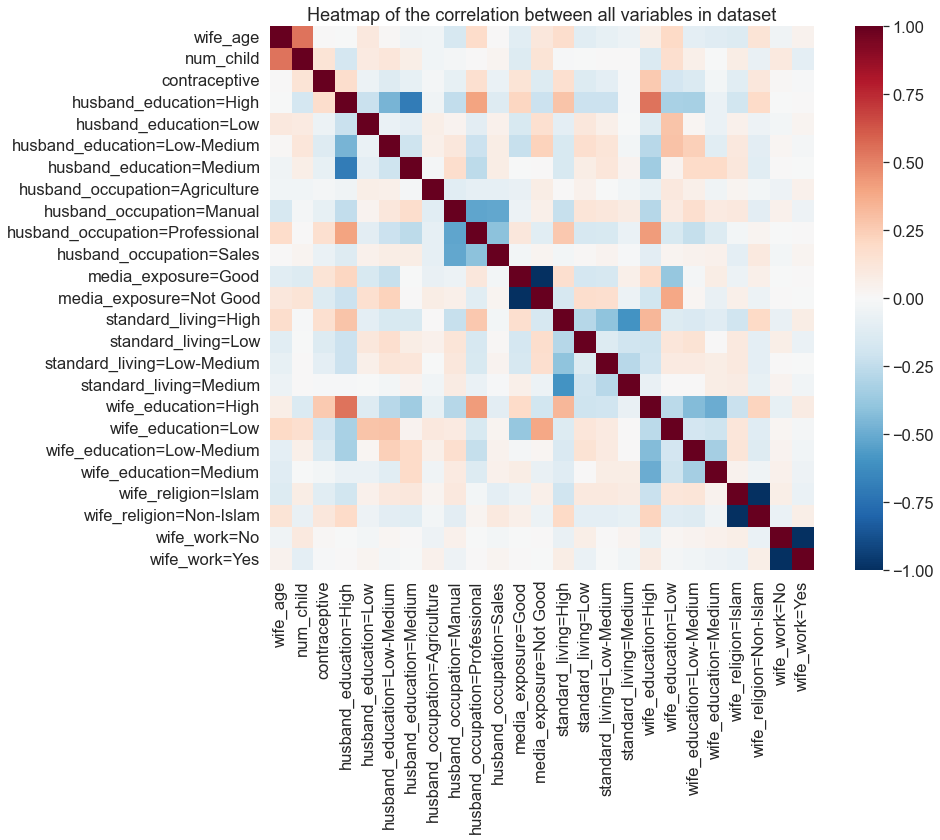

In [71]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(contra_target, mask=np.zeros_like(contra_target, dtype=np.bool), cmap="RdBu_r",
            square=True, ax=ax)
plt.title("Heatmap of the correlation between all variables in dataset")
plt.show();

#Corr of interest: wife_age/num_child vs wife_age/contra, wife_education/husband_Education, wife_education/standard_living vs husband_education/standard

<h3>Em primeiro lugar, queríamos determinar quais atributos estavam mais correlacionados com a educação da esposa e a escolha contraceptiva. Criamos um mapa de calor, usando tanto a profundidade de cor quanto um valor numérico de correlação para determinar que a ocupação do marido, a educação do marido e a exposição à mídia estavam mais correlacionadas com a educação da esposa, sugerindo alguma relação correlativa.</h3>

<Figure size 1440x1440 with 0 Axes>

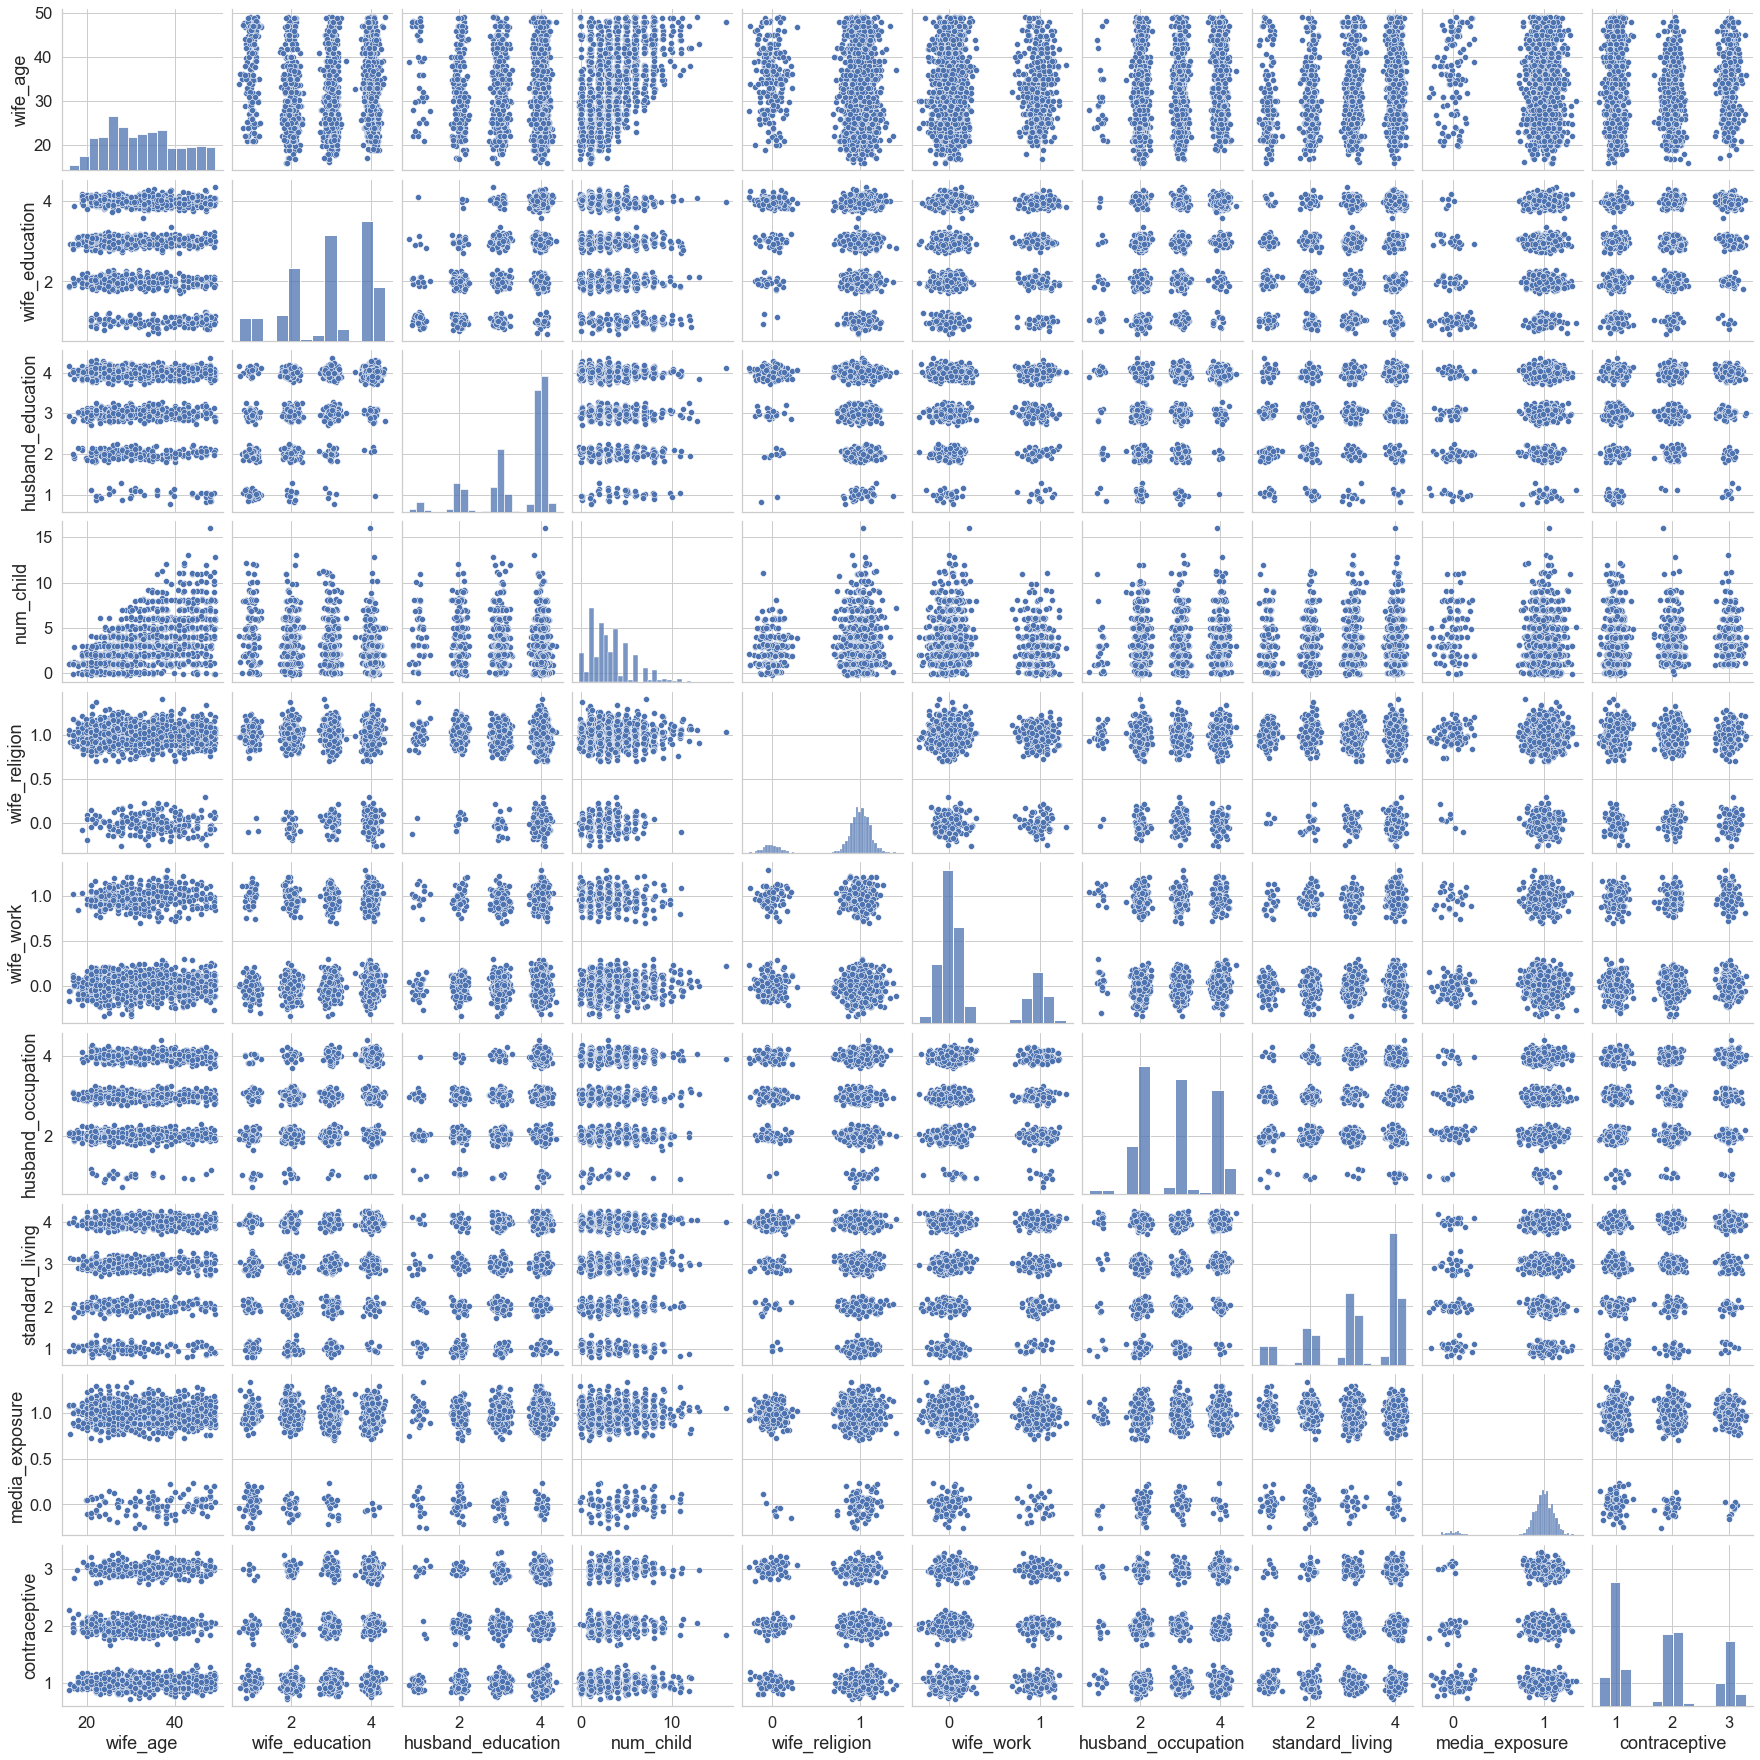

In [72]:
# Used original non-hot encoded dataset for clarity.

plt.figure(figsize = (20, 20))
sns.pairplot(contra_copy + np.random.normal(0, 0.1, size = (len(contra_copy), 10)))
plt.show();

<h3>Não é possível contar muitas informações diretas a partir daqui. Algumas tendências interessantes a serem observadas:</h3>
<ol>
<li>A idade da esposa influencia no número de filhos: as mulheres mais velhas naturalmente têm mais filhos. No entanto, parece que o tipo de contraceptivo utilizado é bastante semelhante.
<li>Mulheres com menos de 20 anos parecem não usar a opção 2 de contraceptivo tanto quanto a opção 1 ou 3. Parece que as mulheres mais velhas tendem a preferir o tipo 1 de contraceptivo por uma margem.
<li>Parece que as mulheres mais instruídas tendem a ter melhor acesso à mídia em comparação com as mulheres menos instruídas.
<li>A educação do marido parece mais um indicador de padrão de vida do que a educação da esposa, o que pode ser porque é culturalmente normal que as mulheres casadas na Indonésia não trabalhem, portanto, não contribuem tanto para as finanças domésticas.
<li>Existe uma correlação relativamente positiva entre o nível de escolaridade da esposa e do marido. Também parece haver uma correlação positiva entre o nível de escolaridade da esposa e a ocupação do marido.
</ol>

Para ter noção de nossos dados, calculamos inicialmente o número de instâncias usando cada tipo de controle de natalidade. Como esperado, a forma mais popular foi a não utilização com 629 ocorrências, seguida por 511 mulheres que usavam opções de curto prazo, enquanto 333 mulheres usaram contraceptivos de longo prazo.

Existem 628 mulheres que não usam anticoncepcionais.
Existem 510 mulheres que usam contraceptivos de curto prazo.
Existem 333 mulheres que usam contraceptivos de longa duração.


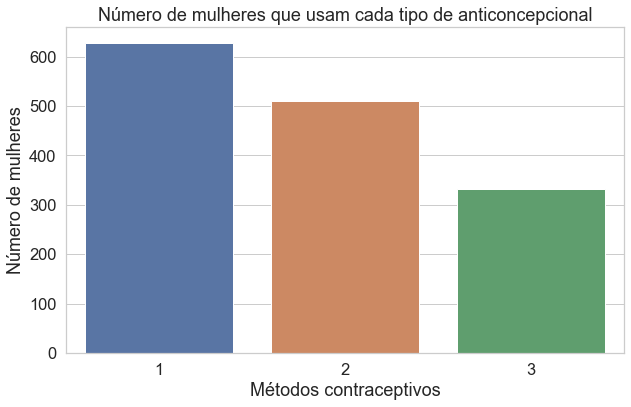

In [102]:
no_use = np.count_nonzero(contra['contraceptive']==1)
short_term = np.count_nonzero(contra['contraceptive']==2)
long_term = np.count_nonzero(contra['contraceptive']==3)

print("Existem", no_use, "mulheres que não usam anticoncepcionais.")
print("Existem", short_term, "mulheres que usam contraceptivos de curto prazo.")
print("Existem", long_term, "mulheres que usam contraceptivos de longa duração.")

plt.figure(figsize=(10,6))
sns.countplot(x='contraceptive',data=contra)
plt.xlabel("Métodos contraceptivos")
plt.title("Número de mulheres que usam cada tipo de anticoncepcional")
plt.ylabel("Número de mulheres")
plt.show();

Nossos gráficos de barras lado a lado visualizam essa tendência em cada um dos níveis de vida padrão. Uma vez que isso seria em parte refletido pela maior proporção global de mulheres nesse padrão de vida, incluímos também a distribuição proporcional da escolha contraceptiva com base no padrão de vida. Seguindo nossa suposição de que o custo pode ser um fator, usamos o padrão de vida como um indicador de status socioeconômico. Como opções contraceptivas de longo prazo, como o DIU, tendem a ser mais caras, nossa hipótese era que mulheres com status socioeconômico mais elevados prefeririam contraceptivos de longo prazo. Nossa análise de tabela pivô sugeriu que, de fato, mais de 60% dessas mulheres que utilizam métodos de longo prazo tinham um padrão de vida no mais alto nível.

In [74]:
#Pivot table based on counts between contraceptions and quality of living
contra_labeled = contra_copy.copy(deep=True)
replace_val(contra_labeled, ["contraceptive"], [1, 2, 3], ["No-use", "Short-term", "Long-term"])
contra_QOL = contra_labeled[["standard_living", "contraceptive"]]

pivot_contra = contra_QOL.pivot_table(index = 'standard_living', columns = 'contraceptive', aggfunc='size')

#Percentage of popularity of the methods in each SOL
pivot_propSOL = pd.DataFrame(columns = ['Long-term', 'No-use', 'Short-term'], 
                             index = ['Low', 'Med-Low', 'Medium', 'High'])
pivot_propSOL.iloc[0] = pivot_contra.iloc[0].values/sum(pivot_contra.iloc[0].values)
pivot_propSOL.iloc[1] = pivot_contra.iloc[1].values/sum(pivot_contra.iloc[1].values)
pivot_propSOL.iloc[2] = pivot_contra.iloc[2].values/sum(pivot_contra.iloc[2].values)
pivot_propSOL.iloc[3] = pivot_contra.iloc[3].values/sum(pivot_contra.iloc[3].values)

pivot_contra, pivot_propSOL

(contraceptive    Long-term  No-use  Short-term
 standard_living                               
 1                        9      80          40
 2                       30     117          82
 3                       90     183         157
 4                      204     248         232,
         Long-term    No-use Short-term
 Low      0.069767  0.620155   0.310078
 Med-Low  0.131004  0.510917   0.358079
 Medium   0.209302  0.425581   0.365116
 High     0.298246  0.362573   0.339181)

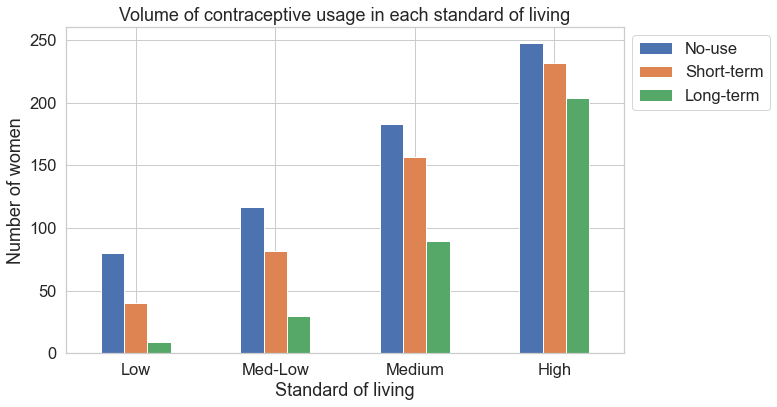

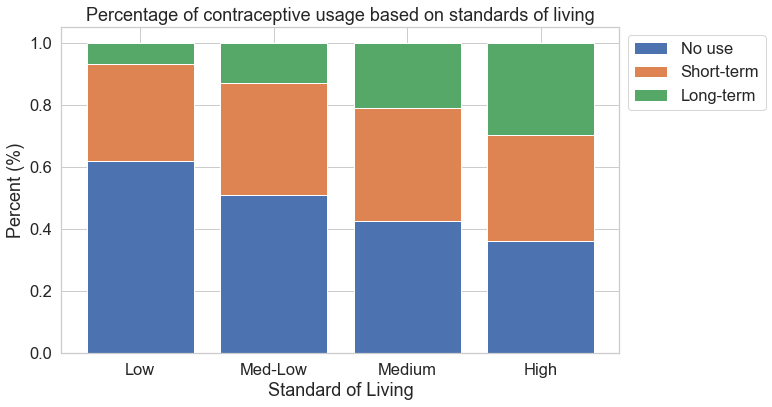

In [75]:
SOL = pivot_contra.iloc[:,[1, 2, 0]].plot(kind="bar", figsize=(10,6))
SOL.set_xticklabels(['Low', 'Med-Low', 'Medium', 'High'])
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xticks(rotation=0)
plt.title("Volume of contraceptive usage in each standard of living")
plt.ylabel("Number of women")
plt.xlabel("Standard of living")

#----------

sd_liv = ['Low', 'Med-Low', 'Medium', 'High']
n = pivot_propSOL['No-use']
l = pivot_propSOL['Long-term']
s = pivot_propSOL['Short-term']

plt.figure(figsize=(10,6))
plt.bar(sd_liv, n, edgecolor='white', label="No use")
plt.bar(sd_liv, s, bottom=n, edgecolor='white', label="Short-term")
plt.bar(sd_liv, l, bottom=n+s, edgecolor='white', label="Long-term")
 
# plt.xticks(sd_liv)
plt.xlabel("Standard of Living")
plt.ylabel("Percent (%)")
plt.title("Percentage of contraceptive usage based on standards of living")
 
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show();

Inicialmente, a suposição era de que o método contraceptivo teria impacto no número de crianças. Mulheres que ou não usavam contraceptivos eram mais propensas a querer mais e ter mais filhos. No entanto, surpreendentemente, descobrimos que as mulheres apenas contraceptivos de curto e longo prazo, em média, têm mais filhos.

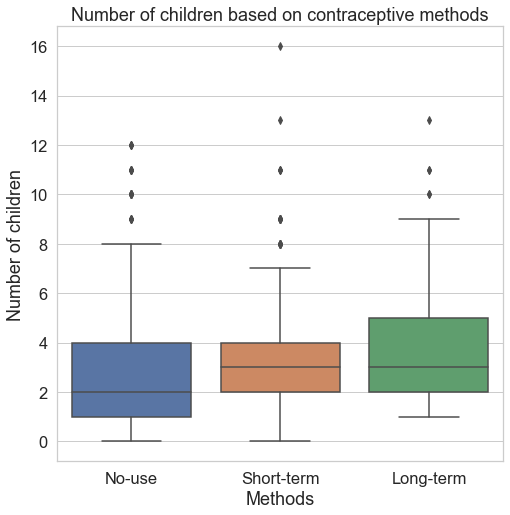

In [76]:
plt.figure(figsize=(8,8))
sns.boxplot(x=contra["contraceptive"], y=contra["num_child"]).set_xticklabels(['No-use', 'Short-term', 'Long-term'])
plt.title("Number of children based on contraceptive methods")
plt.xlabel("Methods")
plt.ylabel("Number of children")
plt.show();

Era reconhecível que a idade de uma mulher pode impactar os contraceptivos utilizados e queria quantificar esse fator de confusão, que foi mostrado no boxplot abaixo:

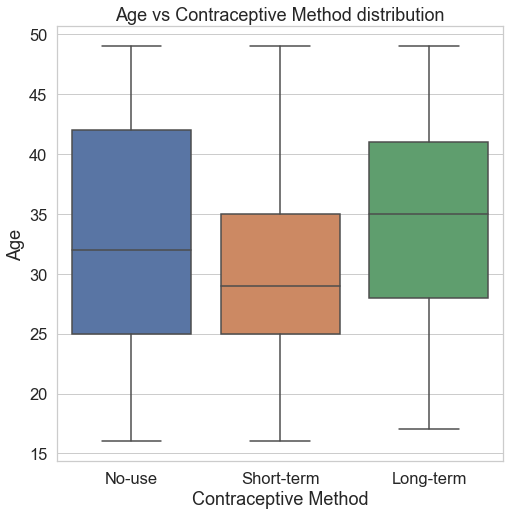

In [77]:
plt.figure(figsize=(8,8))
sns.boxplot(x=contra["contraceptive"], y=contra["wife_age"]).set_xticklabels(['No-use', 'Short-term', 'Long-term'])
plt.ylabel("Age")
plt.title("Age vs Contraceptive Method distribution")
plt.xlabel("Contraceptive Method")
plt.show();

Agora que havia uma relação clara entre status socioeconômico e método contraceptivo, queríamos investigar se havia uma relação entre a educação da esposa e o status socioeconômico que aumentaria nossa previsão de contraceptivo.

Em primeiro lugar, queríamos quantificar o efeito do estado de trabalho da esposa. Dois adultos que trabalham em um domicílio são mais propensos a ter um nível de renda mais elevado, afetando assim o uso de contraceptivos. Nosso EDA descobriu que uma proporção maior de mulheres usando contraceptivos de longo prazo tendem a estar trabalhando, e da mesma forma, mulheres altamente educadas são mais propensas a trabalhar. Isso poderia sugerir que mulheres altamente educadas são mais propensas a trabalhar, e assim optaria por contraceptivos de longo prazo que não as distrairiam de sua carreira.

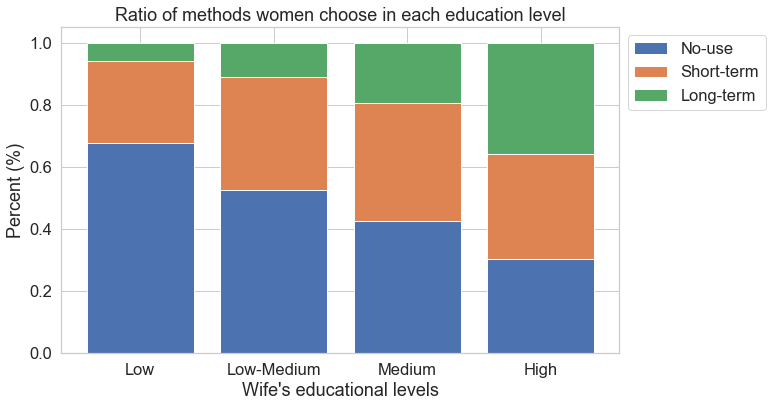

In [78]:
plt.figure(figsize=(10,6))

nouse_totals = [(sum(contra[contra["contraceptive"] == 1]["wife_education=Low"])/(contra[contra["wife_education=Low"]==1].shape[0])),
                (sum(contra[contra["contraceptive"] == 1]["wife_education=Low-Medium"])/(contra[contra["wife_education=Low-Medium"]==1].shape[0])),
                (sum(contra[contra["contraceptive"] == 1]["wife_education=Medium"])/(contra[contra["wife_education=Medium"]==1].shape[0])),
                (sum(contra[contra["contraceptive"] == 1]["wife_education=High"])/(contra[contra["wife_education=High"]==1].shape[0]))]

short_totals = [(sum(contra[contra["contraceptive"] == 2]["wife_education=Low"])/(contra[contra["wife_education=Low"]==1].shape[0])),
                (sum(contra[contra["contraceptive"] == 2]["wife_education=Low-Medium"])/(contra[contra["wife_education=Low-Medium"]==1].shape[0])),
                (sum(contra[contra["contraceptive"] == 2]["wife_education=Medium"])/(contra[contra["wife_education=Medium"]==1].shape[0])),
                (sum(contra[contra["contraceptive"] == 2]["wife_education=High"])/(contra[contra["wife_education=High"]==1].shape[0]))]

long_totals = [(sum(contra[contra["contraceptive"] == 3]["wife_education=Low"])/(contra[contra["wife_education=Low"]==1].shape[0])),
               (sum(contra[contra["contraceptive"] == 3]["wife_education=Low-Medium"])/(contra[contra["wife_education=Low-Medium"]==1].shape[0])),
               (sum(contra[contra["contraceptive"] == 3]["wife_education=Medium"])/(contra[contra["wife_education=Medium"]==1].shape[0])),
               (sum(contra[contra["contraceptive"] == 3]["wife_education=High"])/(contra[contra["wife_education=High"]==1].shape[0]))]

wife_education_nouse = plt.bar(["Low","Low-Medium","Medium","High"], nouse_totals)
wife_education_short = plt.bar(["Low","Low-Medium","Medium","High"], short_totals, bottom = np.array(nouse_totals))
wife_education_long = plt.bar(["Low","Low-Medium","Medium","High"], long_totals, bottom = np.array(nouse_totals) + np.array(short_totals))

plt.xlabel("Wife's educational levels")
plt.ylabel("Percent (%)")
plt.title("Ratio of methods women choose in each education level")
plt.legend((wife_education_nouse, wife_education_short, wife_education_long), ("No-use", "Short-term", "Long-term"),
           loc='upper left', bbox_to_anchor=(1,1))
plt.show();

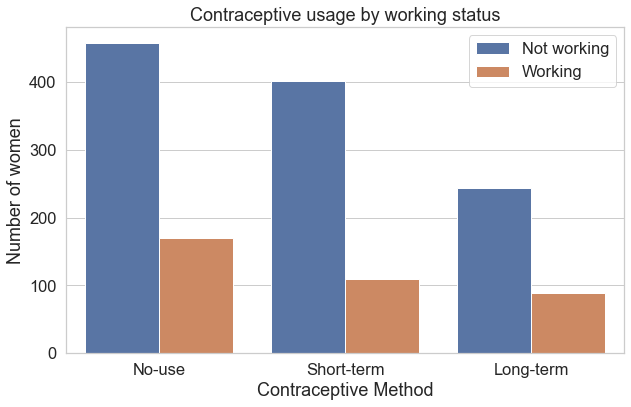

In [79]:
plt.figure(figsize=(10,6))
wrk_wife = sns.countplot(x='contraceptive',data=contra_copy,hue="wife_work")
wrk_wife.set_xticklabels(['No-use', 'Short-term', 'Long-term'])
plt.ylabel("Number of women")
plt.title("Contraceptive usage by working status")
plt.legend(("Not working", "Working"))
plt.xlabel("Contraceptive Method")
plt.show();

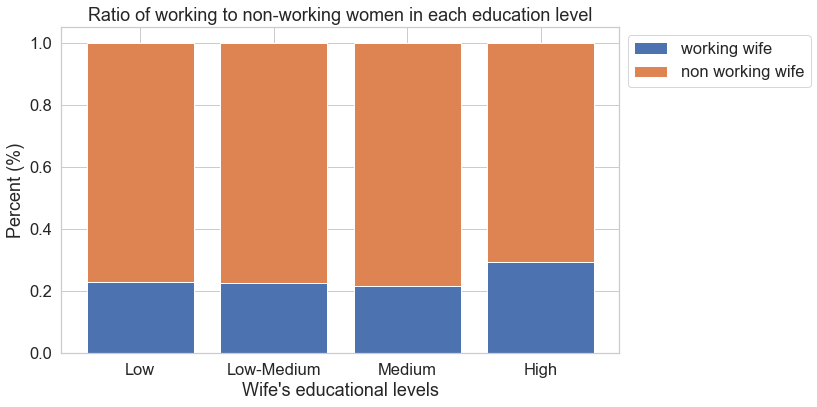

In [80]:
plt.figure(figsize=(10,6))

working_totals = [(sum(contra[contra["wife_work=Yes"] == 1]["wife_education=Low"])/(contra[contra["wife_education=Low"]==1].shape[0])), (sum(contra[contra["wife_work=Yes"] == 1]["wife_education=Low-Medium"])/(contra[contra["wife_education=Low-Medium"]==1].shape[0])), (sum(contra[contra["wife_work=Yes"] == 1]["wife_education=Medium"])/(contra[contra["wife_education=Medium"]==1].shape[0])), (sum(contra[contra["wife_work=Yes"] == 1]["wife_education=High"])/(contra[contra["wife_education=High"]==1].shape[0]))]
non_working_totals = [sum(contra[contra["wife_work=No"] == 1]["wife_education=Low"])/(contra[contra["wife_education=Low"]==1].shape[0]), sum(contra[contra["wife_work=No"] == 1]["wife_education=Low-Medium"])/(contra[contra["wife_education=Low-Medium"]==1].shape[0]), sum(contra[contra["wife_work=No"] == 1]["wife_education=Medium"])/(contra[contra["wife_education=Medium"]==1].shape[0]), sum(contra[contra["wife_work=No"] == 1]["wife_education=High"])/(contra[contra["wife_education=High"]==1].shape[0])]

wife_education_working = plt.bar(["Low","Low-Medium","Medium","High"], working_totals)
wife_education_non_working = plt.bar(["Low","Low-Medium","Medium","High"], non_working_totals, bottom = np.array(working_totals))
plt.xlabel("Wife's educational levels")
plt.ylabel("Percent (%)")
plt.title("Ratio of working to non-working women in each education level")
plt.legend((wife_education_working, wife_education_non_working), ("working wife", "non working wife"),
           loc='upper left', bbox_to_anchor=(1,1))
plt.show();

Após dividir a ocupação do marido em agricultura, manual, vendas e profissional, comparamos a proporção de trabalho com mulheres não trabalhadoras com maridos em cada uma dessas ocupações, bem como a distribuição do nível de escolaridade da esposa nessas ocupações. Supõe-se que os homens em ocupações agrícolas são menos propensos a ter um alto salário e padrão de vida familiar, enquanto os homens em ocupações profissionais são mais propensos a ter um alto salário e alto padrão de vida. Nossos gráficos indicaram que, embora não houvesse uma distinção clara das relações de trabalho/não-trabalho em diferentes ocupações (a maior proporção agrícola pode ser distorcida devido ao seu pequeno tamanho amostral), as esposas com maior escolaridade compõem uma proporção maior das ocupações do marido com maiores salários presumidos (profissionais e vendas). Por outro lado, esposas com menor escolaridade tendem a ter maridos trabalhando em agricultura ou ocupações manuais.

The proportion of working wives with husbands in professional are 0.2545871559633027
The proportion of working wives with husbands in sales are 0.27122641509433965
The proportion of working wives with husbands in manual are 0.22564102564102564
The proportion of working wives with husbands in agriculture are 0.4074074074074074


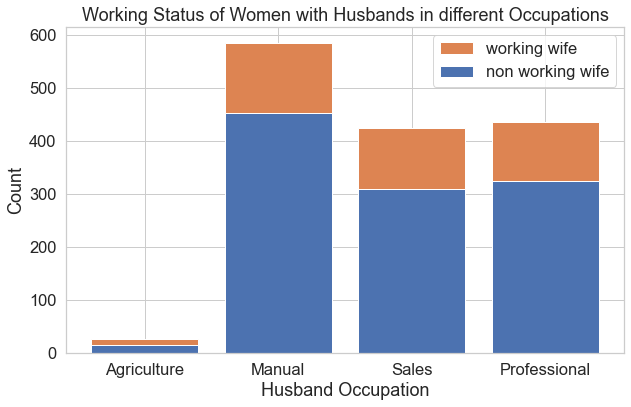

In [81]:
plt.figure(figsize=(10,6))

no_wife_working = [sum(contra[contra["wife_work=No"] == 1]["husband_occupation=Agriculture"]), sum(contra[contra["wife_work=No"] == 1]["husband_occupation=Manual"]), sum(contra[contra["wife_work=No"] == 1]["husband_occupation=Sales"]), sum(contra[contra["wife_work=No"] == 1]["husband_occupation=Professional"])]
wife_working = [sum(contra[contra["wife_work=Yes"] == 1]["husband_occupation=Agriculture"]), sum(contra[contra["wife_work=Yes"] == 1]["husband_occupation=Manual"]), sum(contra[contra["wife_work=Yes"] == 1]["husband_occupation=Sales"]), sum(contra[contra["wife_work=Yes"] == 1]["husband_occupation=Professional"])]

husband_occupation_types_no_wife_work = plt.bar(["Agriculture","Manual","Sales","Professional"], no_wife_working)
husband_occupation_types_wife_work = plt.bar(["Agriculture","Manual","Sales","Professional"], wife_working, bottom = np.array(no_wife_working))

plt.legend((husband_occupation_types_wife_work, husband_occupation_types_no_wife_work), ("working wife", "non working wife"))
plt.title("Working Status of Women with Husbands in different Occupations")
plt.xlabel("Husband Occupation")
plt.ylabel("Count")

print("The proportion of working wives with husbands in professional are", contra[(contra["wife_work=Yes"] == 1) & (contra["husband_occupation=Professional"] ==1)].shape[0]/contra[contra["husband_occupation=Professional"] ==1].shape[0])
print("The proportion of working wives with husbands in sales are", contra[(contra["wife_work=Yes"] == 1) & (contra["husband_occupation=Sales"] ==1)].shape[0]/contra[contra["husband_occupation=Sales"] ==1].shape[0])
print("The proportion of working wives with husbands in manual are", contra[(contra["wife_work=Yes"] == 1) & (contra["husband_occupation=Manual"] ==1)].shape[0]/contra[contra["husband_occupation=Manual"] ==1].shape[0])
print("The proportion of working wives with husbands in agriculture are", contra[(contra["wife_work=Yes"] == 1) & (contra["husband_occupation=Agriculture"] ==1)].shape[0]/contra[contra["husband_occupation=Agriculture"] ==1].shape[0])


plt.show();

Nós traçamos e encontramos resultados semelhantes comparando os níveis de educação de marido e mulher, então decidimos agregar seus níveis de educação com uma média para comparar com o padrão de vida em um lote de dispersão. Como esperado, famílias com maior escolaridade agregada são mais propensas a resultar em um alto padrão de vida, o que afetaria os métodos contraceptivos de escolha.

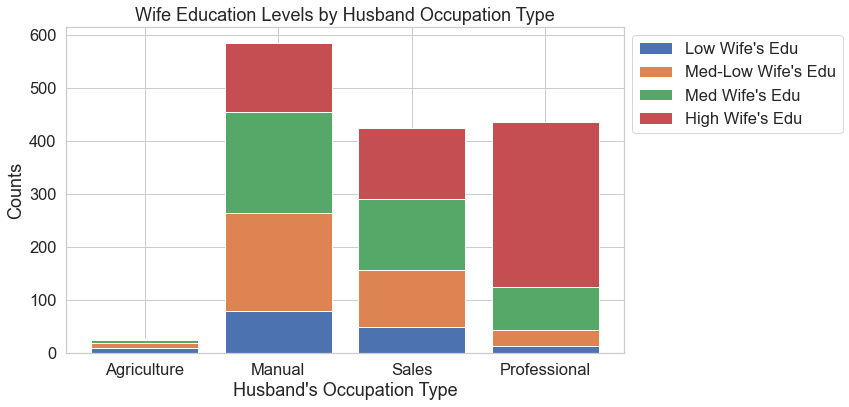

In [82]:
plt.figure(figsize=(10,6))

occ_wife_ed1= [sum(contra[contra["wife_education=Low"] == 1]["husband_occupation=Agriculture"]), sum(contra[contra["wife_education=Low"] == 1]["husband_occupation=Manual"]), sum(contra[contra["wife_education=Low"] == 1]["husband_occupation=Sales"]), sum(contra[contra["wife_education=Low"] == 1]["husband_occupation=Professional"])]
occ_wife_ed2= [sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_occupation=Agriculture"]), sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_occupation=Manual"]), sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_occupation=Sales"]), sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_occupation=Professional"])]
occ_wife_ed3 = [sum(contra[contra["wife_education=Medium"] == 1]["husband_occupation=Agriculture"]), sum(contra[contra["wife_education=Medium"] == 1]["husband_occupation=Manual"]), sum(contra[contra["wife_education=Medium"] == 1]["husband_occupation=Sales"]), sum(contra[contra["wife_education=Medium"] == 1]["husband_occupation=Professional"])]
occ_wife_ed4 = [sum(contra[contra["wife_education=High"] == 1]["husband_occupation=Agriculture"]), sum(contra[contra["wife_education=High"] == 1]["husband_occupation=Manual"]), sum(contra[contra["wife_education=High"] == 1]["husband_occupation=Sales"]), sum(contra[contra["wife_education=High"] == 1]["husband_occupation=Professional"])]

husband_occ_by_wife_ed1 = plt.bar(["Agriculture","Manual","Sales","Professional"], occ_wife_ed1)
husband_occ_by_wife_ed2 = plt.bar(["Agriculture","Manual","Sales","Professional"], occ_wife_ed2, bottom = np.array(occ_wife_ed1))
husband_occ_by_wife_ed3 = plt.bar(["Agriculture","Manual","Sales","Professional"], occ_wife_ed3, bottom = np.array(occ_wife_ed1) + np.array(occ_wife_ed2))
husband_occ_by_wife_ed4 = plt.bar(["Agriculture","Manual","Sales","Professional"], occ_wife_ed4, bottom = np.array(occ_wife_ed1) + np.array(occ_wife_ed2) + np.array(occ_wife_ed3))

plt.legend((husband_occ_by_wife_ed1, husband_occ_by_wife_ed2, husband_occ_by_wife_ed3, husband_occ_by_wife_ed4), 
           ("Low Wife's Edu", "Med-Low Wife's Edu", "Med Wife's Edu", "High Wife's Edu"),
           loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xlabel("Husband's Occupation Type")
plt.ylabel("Counts")
plt.title("Wife Education Levels by Husband Occupation Type")
plt.show();

The proportion of highly educated husbands with highly educated wives is 0.6051167964404894


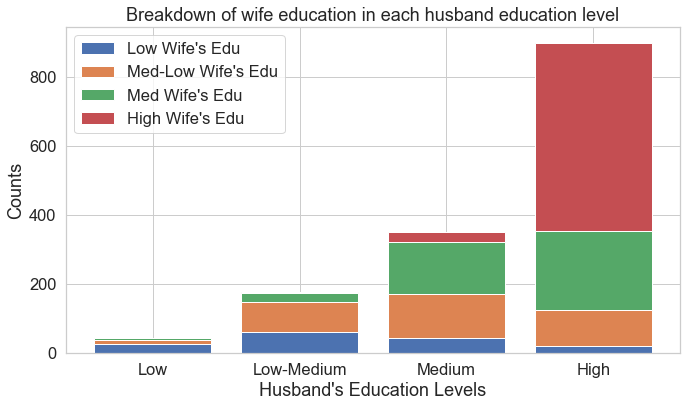

In [83]:
plt.figure(figsize=(11,6))

wife_ed1 = [sum(contra[contra["wife_education=Low"] == 1]["husband_education=Low"]), sum(contra[contra["wife_education=Low"] == 1]["husband_education=Low-Medium"]), sum(contra[contra["wife_education=Low"] == 1]["husband_education=Medium"]), sum(contra[contra["wife_education=Low"] == 1]["husband_education=High"])]
wife_ed2 = [sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_education=Low"]), sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_education=Low-Medium"]), sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_education=Medium"]), sum(contra[contra["wife_education=Low-Medium"] == 1]["husband_education=High"])]
wife_ed3 = [sum(contra[contra["wife_education=Medium"] == 1]["husband_education=Low"]), sum(contra[contra["wife_education=Medium"] == 1]["husband_education=Low-Medium"]), sum(contra[contra["wife_education=Medium"] == 1]["husband_education=Medium"]), sum(contra[contra["wife_education=Medium"] == 1]["husband_education=High"])]
wife_ed4 = [sum(contra[contra["wife_education=High"] == 1]["husband_education=Low"]), sum(contra[contra["wife_education=High"] == 1]["husband_education=Low-Medium"]), sum(contra[contra["wife_education=High"] == 1]["husband_education=Medium"]), sum(contra[contra["wife_education=High"] == 1]["husband_education=High"])]

husband_education_by_wife_ed1 = plt.bar(["Low","Low-Medium","Medium","High"], wife_ed1)
husband_education_by_wife_ed2 = plt.bar(["Low","Low-Medium","Medium","High"], wife_ed2, bottom = np.array(wife_ed1))
husband_education_by_wife_ed3 = plt.bar(["Low","Low-Medium","Medium","High"], wife_ed3, bottom = np.array(wife_ed1) + np.array(wife_ed2))
husband_education_by_wife_ed4 = plt.bar(["Low","Low-Medium","Medium","High"], wife_ed4, bottom = np.array(wife_ed1) + np.array(wife_ed2) + np.array(wife_ed3))

plt.legend((husband_education_by_wife_ed1, husband_education_by_wife_ed2, husband_education_by_wife_ed3, husband_education_by_wife_ed4), 
           ("Low Wife's Edu", "Med-Low Wife's Edu", "Med Wife's Edu", "High Wife's Edu"))
plt.ylabel("Counts")
plt.xlabel("Husband's Education Levels")
plt.title("Breakdown of wife education in each husband education level")


print("The proportion of highly educated husbands with highly educated wives is", contra[(contra["wife_education=High"] == 1) & (contra["husband_education=High"] ==1)].shape[0]/contra[contra["husband_education=High"] ==1].shape[0])
plt.show();

c:\Users\tassi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


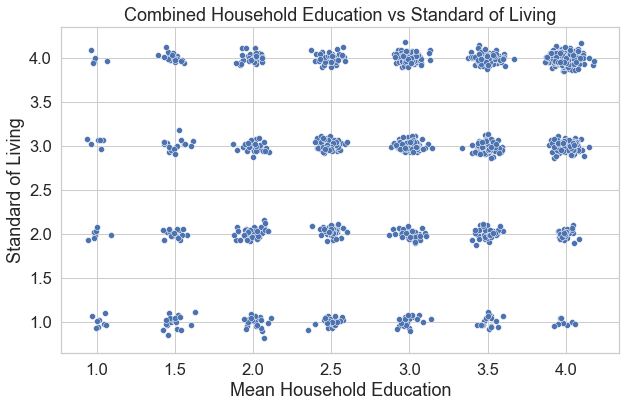

In [84]:
plt.figure(figsize=(10, 6))
contra_copy["household_education"] = (contra_copy["husband_education"] + contra_copy["wife_education"])/2
combined_QOL = sns.scatterplot(contra_copy["household_education"] + np.random.normal(0, 0.05, size = len(contra_copy)), contra_copy["standard_living"] + np.random.normal(0, 0.05, size = len(contra_copy)))
plt.xlabel("Mean Household Education")
plt.ylabel("Standard of Living")
plt.title("Combined Household Education vs Standard of Living")
plt.show();

Finalmente, para reduzir a dimensionalidade de nossos dados e avaliar quais características podem ser fortes indicadores de uso contraceptivo, realizamos a Análise de Componentes Principais em nosso conjunto original de dados não-quentes codificados para fins de clareza. Parecia que os três primeiros componentes principais geravam a maioria da variância. Depois de traçar os três primeiros conjuntos de ponderações de recursos, descobrimos que as características que provavelmente fornecerão insights sobre métodos contraceptivos em nossos modelos são idade da esposa, educação de esposa, educação de marido e ocupação de marido.

Variances with all features: [0.89 0.05 0.03 0.01 0.01 0.01 0.   0.   0.   0.   0.  ]


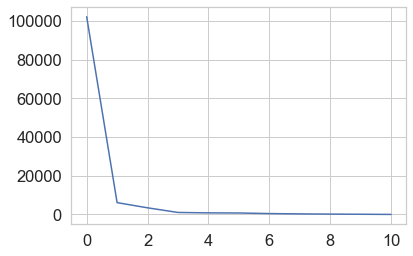

In [85]:
def compute_rank_k_approximation(data, k):
    u, s, vt = np.linalg.svd(data, full_matrices = False)
    return pd.DataFrame(u[:, 0:k] @ np.diag(s[0:k]) @ vt[0:k, :], columns = data.columns)

contra_centered = contra_copy - np.mean(contra_copy, axis = 0)

u_full, s_full, vt_full = np.linalg.svd(contra_centered, full_matrices = False)
variances_with_all_features = np.round(s_full**2 / sum(s_full**2), 2)
print('Variações com todos os recursos:', variances_with_all_features)

plt.plot(s_full**2)
plt.show();

A idade ocupa uma grande parte da variância, então tentamos o PCA sem ele para avaliar quais características socioeconômicas formam os PCs para gerar maior variância.

Variances without age features: [0.54 0.23 0.07 0.05 0.05 0.03 0.02 0.01 0.01 0.  ]


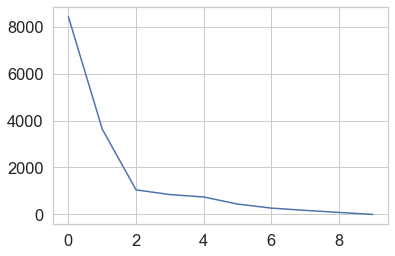

In [86]:
u, s, vt = np.linalg.svd(contra_centered.iloc[:, 1:], full_matrices = False)
variances_without_age_features = np.round(s**2 / sum(s**2), 2)
print('Variações com todos os recursos:', variances_without_age_features)
plt.plot(s**2)
plt.show();


Parece que os primeiros três-quatro componentes principais compõem uma grande parte da variação.

In [87]:
#Rank 3 fornecem uma recriação bastante próxima do conjunto de dados original.
contra_rank_3_approximation = compute_rank_k_approximation(contra_centered, 3) +  np.mean(contra_copy, axis = 0)
contra_rank_3_approximation = np.round(contra_rank_3_approximation, 0)
contra_rank_3_approximation.head(5)

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive,household_education
0,45.0,2.0,2.0,10.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0
1,43.0,2.0,3.0,7.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0
2,42.0,2.0,3.0,9.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0
3,36.0,2.0,3.0,8.0,1.0,0.0,3.0,3.0,1.0,2.0,3.0
4,19.0,4.0,4.0,-0.0,1.0,0.0,3.0,3.0,1.0,2.0,4.0


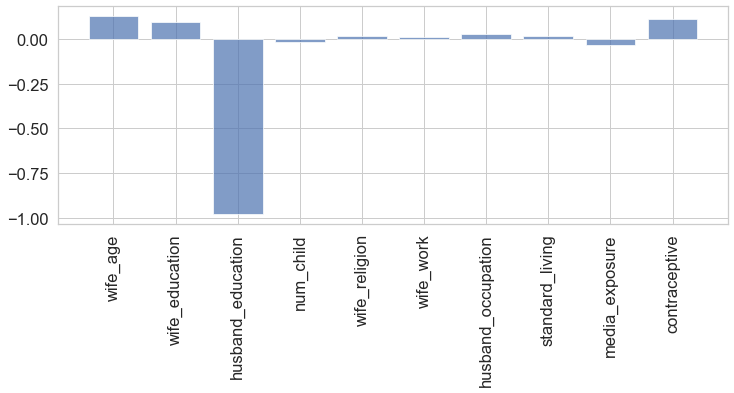

In [88]:
#Traçar quais recursos têm o maior peso nos PCs.
def pc_weighting(columns, vt, k):
    plt.bar(columns, vt[k, :], alpha=0.7)
    plt.xticks(col_names, rotation=90);
  
col_names = contra_copy.columns
col_names = col_names[:-1]

with plt.rc_context({"figure.figsize": (12, 4)}):
  pc_weighting(col_names, vt, 0);


Dos três primeiros PCs, podemos ver que as características mais pesadas (além do contraceptivo), são esposa_idade, esposa_educação, marido_educação e marido_ocupação. Os recursos com as menores ponderações absolutas são num_child e wife_religion.

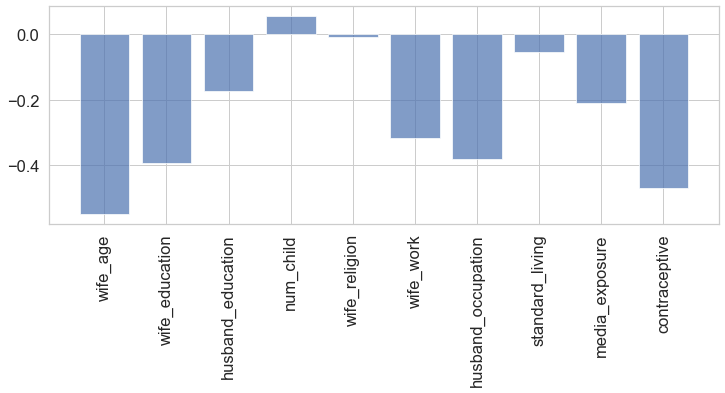

In [89]:
with plt.rc_context({"figure.figsize": (12, 4)}):
  pc_weighting(col_names, vt, 1);

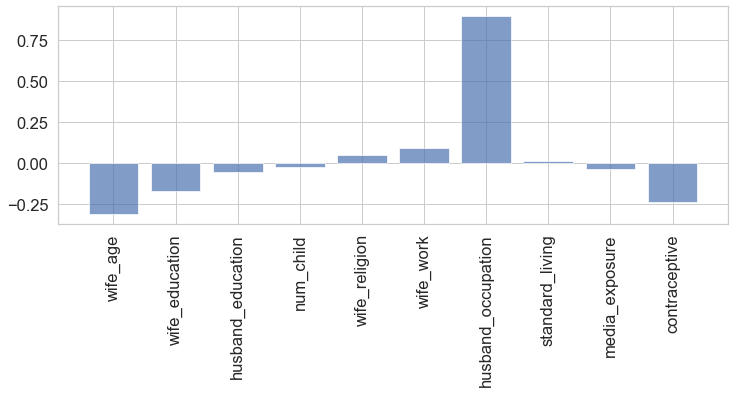

In [90]:
with plt.rc_context({"figure.figsize": (12, 4)}):
  pc_weighting(col_names, vt, 2);

Dos três primeiros PCs, podemos ver que as características mais pesadas (além do contraceptivo), são esposa_idade, esposa_educação, marido_educação e marido_ocupação. Os recursos com as menores ponderações absolutas são num_child e wife_religion.

# NORMALIZANDO

In [91]:
def df_normalize(df, col):
      #dF: dataframe / col: list of column
  df[col] = (df[col] - df[col].mean()) / df[col].std()


df_normalize(contra, ["wife_age"])
df_normalize(contra, ["num_child"])
contra.head(5)

,wife_age,num_child,contraceptive,husband_education=High,husband_education=Low,husband_education=Low-Medium,husband_education=Medium,husband_occupation=Agriculture,husband_occupation=Manual,husband_occupation=Professional,...,standard_living=Low-Medium,standard_living=Medium,wife_education=High,wife_education=Low,wife_education=Low-Medium,wife_education=Medium,wife_religion=Islam,wife_religion=Non-Islam,wife_work=No,wife_work=Yes
0,1.514015,2.856074,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.270914,1.584532,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.149363,2.432227,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.420060,2.008379,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-1.646300,-1.382399,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# OUTLIER REMOVAL
### Com base nas EDAs acima, observamos que há um outlier de um domicílio com 16 crianças (5,401045 após a normalização). Preocupados que esse outlier possa afetar a precisão dos modelos, decidimos criar um novo dataframe sem ele para testar se a precisão é melhorada.

In [92]:
contra.sort_values(by="num_child", ascending = False).head(5)

,wife_age,num_child,contraceptive,husband_education=High,husband_education=Low,husband_education=Low-Medium,husband_education=Medium,husband_occupation=Agriculture,husband_occupation=Manual,husband_occupation=Professional,...,standard_living=Low-Medium,standard_living=Medium,wife_education=High,wife_education=Low,wife_education=Low-Medium,wife_education=Medium,wife_religion=Islam,wife_religion=Non-Islam,wife_work=No,wife_work=Yes
652,1.878667,5.399157,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
674,2.000217,4.127616,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
518,1.270914,4.127616,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
181,1.149363,3.703768,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1012,0.663161,3.703768,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [93]:
contra.drop(contra[contra['num_child'] > 5].index, inplace= True)
contra.head(5)

,wife_age,num_child,contraceptive,husband_education=High,husband_education=Low,husband_education=Low-Medium,husband_education=Medium,husband_occupation=Agriculture,husband_occupation=Manual,husband_occupation=Professional,...,standard_living=Low-Medium,standard_living=Medium,wife_education=High,wife_education=Low,wife_education=Low-Medium,wife_education=Medium,wife_religion=Islam,wife_religion=Non-Islam,wife_work=No,wife_work=Yes
0,1.514015,2.856074,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.270914,1.584532,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.149363,2.432227,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.420060,2.008379,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-1.646300,-1.382399,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# MODEL

In [94]:
#Dividir o conjunto de dados em conjunto de treinamento e conjunto de teste

X = contra.drop('contraceptive', axis=1)
Y = contra['contraceptive']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1103, 24) (368, 24) (1103,) (368,)


# Regressão Logística Multiclasse

### Existem 3 classes de métodos contraceptivos (sem uso / curto prazo / longo prazo) para classificar usando determinados recursos. Este é um problema de classificação multiclasse. Estamos usando a abordagem um contra o resto, onde o problema de previsão multiclasse é dividido em problemas separados de previsão binária.

In [95]:
#Regressão Logística com recursos numéricos

X_base= contra[["wife_age", "num_child"]]

lr_base = LogisticRegression(random_state=42, solver='lbfgs', multi_class = 'auto', max_iter = 5000, dual=False)
lr_base.fit(X_base, Y)

accuracy_base = lr_base.score(X_base, Y)
accuracy_cvbase = cross_val_score(lr_base, X_base, Y, scoring='accuracy', cv = 10)

print("Precisão do trem do modelo:", accuracy_base)
print("Precisão do modelo com validação cruzada:",accuracy_cvbase.mean())

Accuracy of Model: 0.4772263766145479
Accuracy of Model with Cross Validation: 0.4758779187350616


In [96]:
#Regressão logística múltipla um contra o resto, divisão de teste de trem com todos os recursos

lr = LogisticRegression(multi_class = 'ovr', solver='lbfgs', random_state=42, max_iter = 5000, dual=False)
lr.fit(X_train, Y_train)

accuracy_spt = lr.score(X_train, Y_train)
accuracy_cvspt = cross_val_score(lr, X_train, Y_train, scoring='accuracy', cv = 10)

print("Precisão do trem do modelo:", accuracy_spt)
print("Precisão do modelo com validação cruzada:",accuracy_cvspt.mean())

Train Accuracy of Model: 0.5258386219401632
Accuracy of Model with Cross Validation: 0.5022358722358722


In [97]:
#Encontre os recursos pesados

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10, random_state=42)
model.fit(X_train, Y_train)

labels = X_train.columns.values.tolist()
feature_importances = model.feature_importances_

importance = pd.DataFrame({
    'features': labels,
    'importance': feature_importances})
importance.sort_values(by='importance', ascending=False, inplace=True)
features = importance[importance['importance'] > 0.02]['features'].values.tolist()

In [98]:
X_fea = contra[features]

X_train_f, X_test_f, Y_train, Y_test = train_test_split(X_fea, Y, test_size=0.25, random_state=42)

lr = LogisticRegression(multi_class = 'ovr', solver='lbfgs', random_state=42, max_iter = 5000, dual=False)
lr.fit(X_train_f, Y_train)

accuracy_fea = lr.score(X_train_f, Y_train)
accuracy_cvfea = cross_val_score(lr, X_train_f, Y_train, scoring='accuracy', cv = 10)

print("Precisão do trem do modelo:", accuracy_fea)
print("Precisão do modelo com validação cruzada:", accuracy_cvfea.mean())

Train Accuracy of Model: 0.5131459655485041
Accuracy of Model with Cross Validation: 0.4977559377559377


In [99]:

#Regressão logística múltipla, divisão de trem/teste com recursos altamente correlacionados

X_corrfea = contra[corr_features.index]
X_train_c, X_test_c, Y_train, Y_test = train_test_split(X_corrfea, Y, test_size=0.25, random_state=42)

lr = LogisticRegression(multi_class = 'ovr', solver='lbfgs', random_state=42, max_iter = 5000, dual=False)
lr.fit(X_train_c, Y_train)

accuracy_corr = lr.score(X_train_c, Y_train)
accuracy_cvcorr = cross_val_score(lr, X_train_c, Y_train, scoring='accuracy', cv = 10)

print("Precisão do trem do modelo:", accuracy_corr)
print("Precisão do modelo com validação cruzada:",accuracy_cvcorr.mean())

Train Accuracy of Model: 0.4605621033544878
Accuracy of Model with Cross Validation: 0.45422604422604423



A partir dos resultados acima, podemos ver que o uso de MLR em todos os recursos produz o melhor resultado entre os modelos LR. A pontuação de melhoria do modelo é de 0,03 ou 3%.